In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta

In [6]:
#read parquet files

df = pd.read_parquet("/home/user/Desktop/wheres-my-taxi/wheres-my-taxi/2019_data/yellow_tripdata_2019-01.parquet", 
                     columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount'])

### Data Preprocessing

In [8]:
df.shape

(7696617, 12)

In [9]:
col_names = df.columns
col_names

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696617 entries, 0 to 7696616
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  total_amount           float64       
dtypes: datetime64[ns](2), float64(5), int64(4), object(1)
memory usage: 704.6+ MB


In [11]:
#check for null values
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
store_and_fwd_flag       28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
total_amount                 0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,7696617.0,1.638174,0.539398,1.0,1.0,2.00,2.00,5.00
passenger_count,7667945.0,1.567032,1.224420,0.0,1.0,1.00,2.00,9.00
trip_distance,7696617.0,2.830146,3.774548,0.0,0.9,1.53,2.83,831.80
RatecodeID,7667945.0,1.058371,0.678084,1.0,1.0,1.00,1.00,99.00
PULocationID,7696617.0,165.400456,66.439923,1.0,127.0,162.00,234.00,265.00
DOLocationID,7696617.0,163.628909,70.409289,1.0,113.0,162.00,234.00,265.00
payment_type,7696617.0,1.286947,0.478942,0.0,1.0,1.00,2.00,4.00
fare_amount,7696617.0,12.529677,261.589747,-362.0,6.0,9.00,13.50,623259.86
total_amount,7696617.0,15.810651,261.811706,-362.8,8.3,11.30,16.60,623261.66


fare amount, trip distance, total amount has std > mean. 
congestion surcharge and airport fee can be dropped. RatecodeID has max value of 9(Expected upto 6).

In [13]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 1 categorical variables

The categorical variables are : ['store_and_fwd_flag']


In [14]:
#Drop all the rows having Pickup and dropoff location outside 1 to 263
#Drop all rows having date not 2019
#Drop rows having trip distance,duration, fare less than or equal to 0

df = df.drop(df[((df.PULocationID>263) 
                 | (df.PULocationID<1) 
                 | (df.DOLocationID>263) 
                 | (df.DOLocationID<1) 
                 | (df.tpep_pickup_datetime.dt.year!=2019) 
                 | (df.trip_distance==0) 
                 | (df.fare_amount<=0) 
                 | (df.total_amount<=0))].index)

In [15]:
#add columns of days, hour, and month

df['PUmonth'] = df['tpep_pickup_datetime'].dt.month
df['DOmonth'] = df['tpep_dropoff_datetime'].dt.month
df['PUday'] = df['tpep_pickup_datetime'].dt.day_name()
df['DOday'] = df['tpep_dropoff_datetime'].dt.day_name()
df['PUhour'] = df['tpep_pickup_datetime'].dt.hour
df['DOhour'] = df['tpep_dropoff_datetime'].dt.hour

In [16]:
#add total seconds, duration

df['total_sec'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [ ]:
df['PUday'] = df.tpep_pickup_datetime.dt.day_name()
df['DOday'] = df.tpep_dropoff_datetime.dt.day_name()
#not adding parenthesis in above cell created object type of day name

In [17]:
df['PUdate'] = df.tpep_pickup_datetime.dt.date
df['DOdate'] = df.tpep_dropoff_datetime.dt.date

In [10]:
#df = df.drop(df[((df.PUmonth != 1) | (df.DOmonth !=1 ))])

In [34]:
#df = df.drop(['store_and_fwd_flag'],axis=1)

In [97]:
df.to_pickle("pickled_parquet_2.pkl")

# Univariate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [2]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [5]:
df.skew()

/tmp/ipykernel_6480/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


VendorID              0.469472
passenger_count       2.217421
trip_distance         3.008637
RatecodeID          115.177326
PULocationID         -0.271029
DOLocationID         -0.325737
payment_type          1.005700
fare_amount           2.860210
total_amount          3.341880
total_sec          -189.344923
PUmonth               0.000000
DOmonth            1394.223440
PUhour               -0.470174
DOhour               -0.491009
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2491d744f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2491d74b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2491d74310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2491d75210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2491d75720>],
 'means': []}

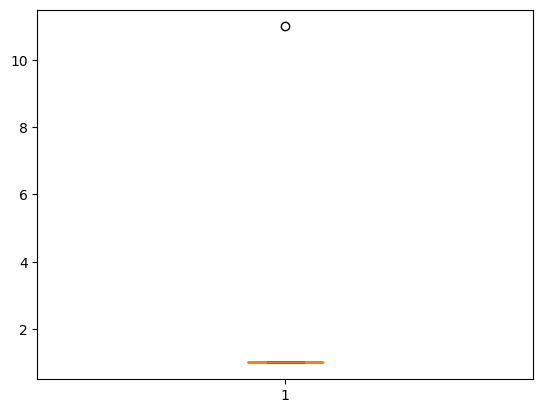

In [6]:
plt.boxplot(df.DOmonth)

In [3]:
col_names = df.columns
col_names

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [4]:
df.drop(['PUZone','DOZone'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943859 entries, 0 to 1999999
Data columns (total 22 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  total_amount           float64        
 12  total_sec              float64        
 13  duration               timedelta64[ns]
 14  PUmonth                int64          
 15  DOmonth                int64          
 16  PUday                  object         
 17  DOday                  object         
 18  PU

<AxesSubplot: ylabel='VendorID'>

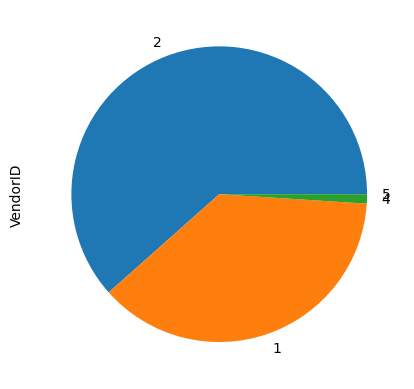

In [20]:
df['VendorID'].value_counts().plot.pie()

In [21]:
df['RatecodeID'].value_counts()

1.0     7234032
2.0      155505
5.0       33622
3.0       10289
4.0         506
99.0        104
6.0          14
Name: RatecodeID, dtype: int64

<AxesSubplot: >

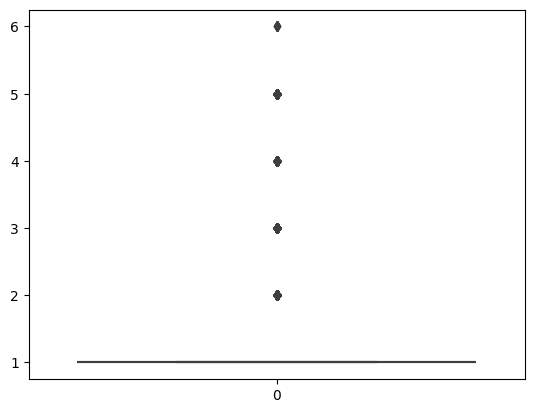

In [6]:
df.drop(df[df.RatecodeID >6].index,inplace=True)
sns.boxplot(df.RatecodeID)

In [7]:
df['passenger_count'].value_counts()

1.0    1363467
2.0     292274
3.0      84672
5.0      84511
6.0      52579
4.0      40035
0.0      26290
8.0          2
7.0          2
Name: passenger_count, dtype: int64

In [8]:
df.passenger_count.isnull().sum()

0

0 passenger count 107177. 28111 null values in passenger count.

In [ ]:
#autofill passenger count as 1 if NAN

df.passenger_count = df.passenger_count.fillna(1)


<AxesSubplot: xlabel='passenger_count', ylabel='count'>

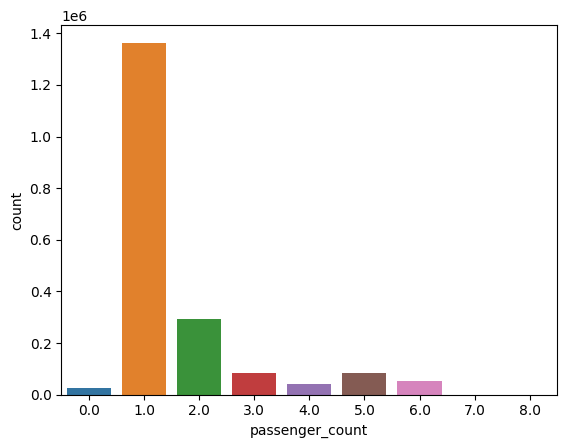

In [11]:
sns.countplot(data=df, x='passenger_count')

.

.

### Day, Time, Month

<AxesSubplot: title={'center': 'Dropoff Days'}, xlabel='DOday', ylabel='count'>

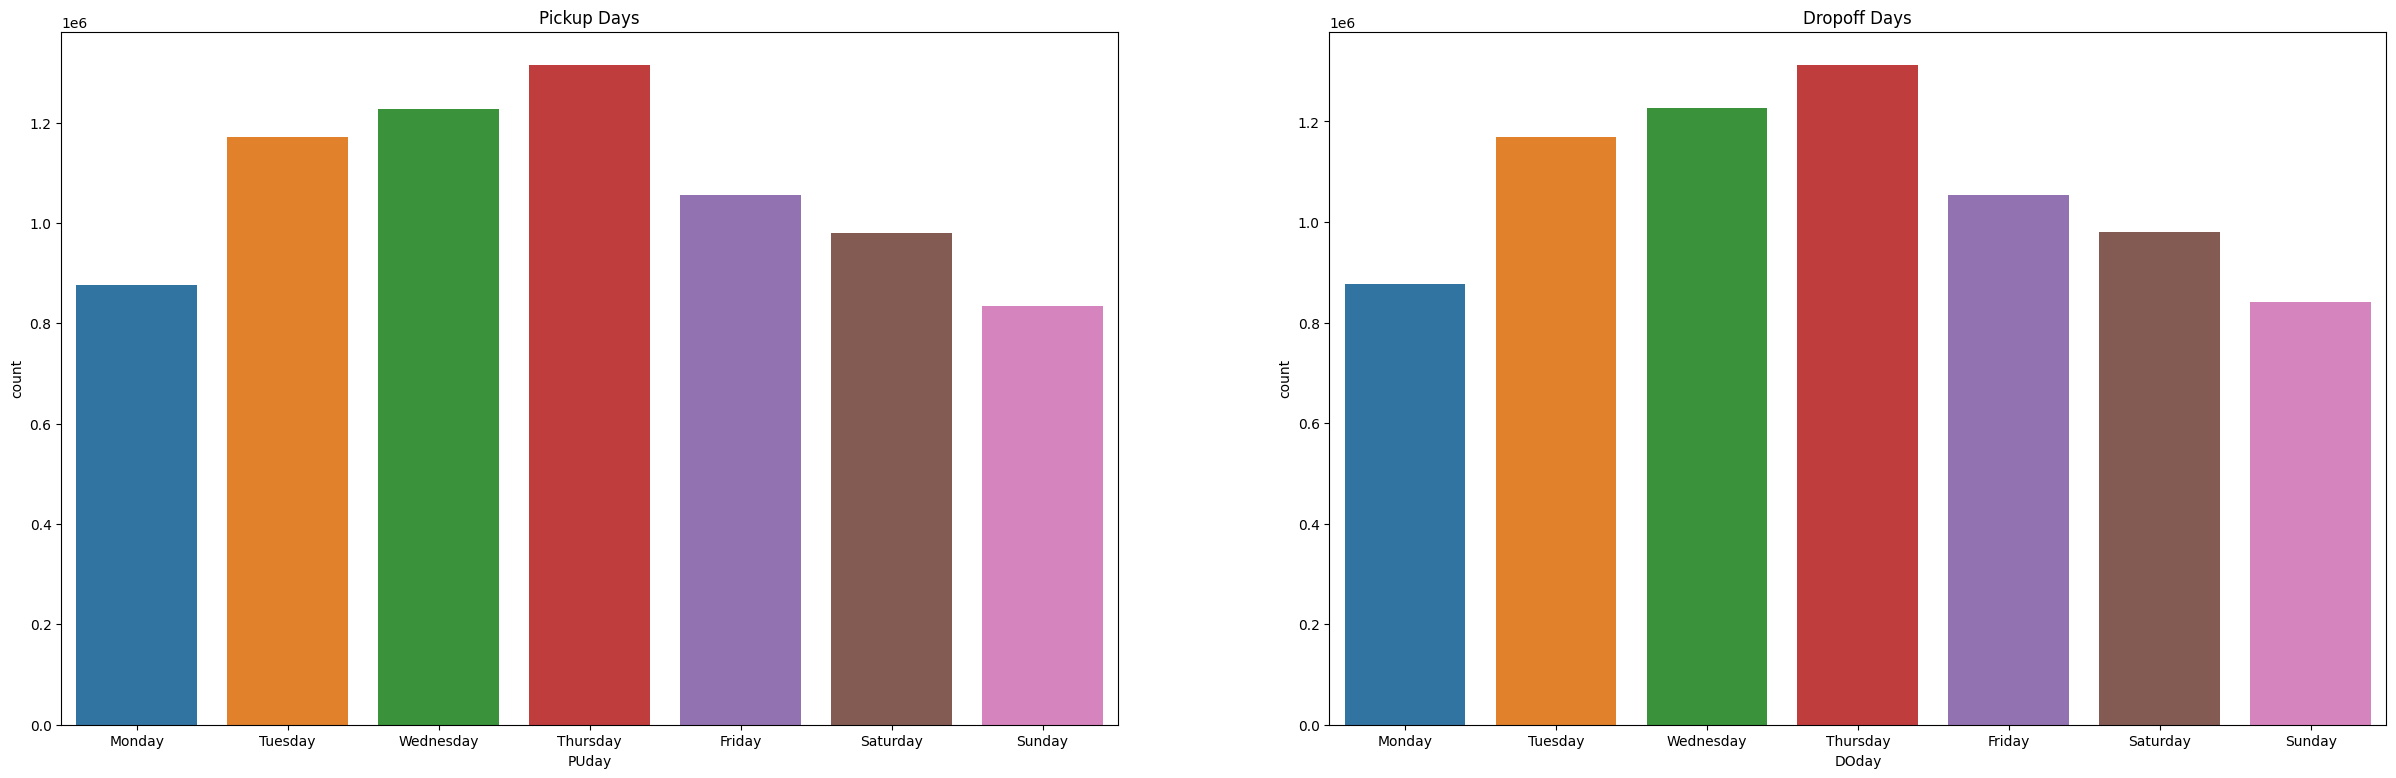

In [28]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title("Pickup Days")
sns.countplot(x='PUday', data=df, ax=ax1, order=days)
ax2.set_title("Dropoff Days")
sns.countplot(x='DOday', data=df, ax=ax2, order=days)

In [5]:
def Duration(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'

In [6]:
df['PUtime'] = df['PUhour'].apply(Duration)
df['DOtime'] = df['DOhour'].apply(Duration)

<AxesSubplot: title={'center': 'Dropoff time'}, xlabel='DOtime', ylabel='count'>

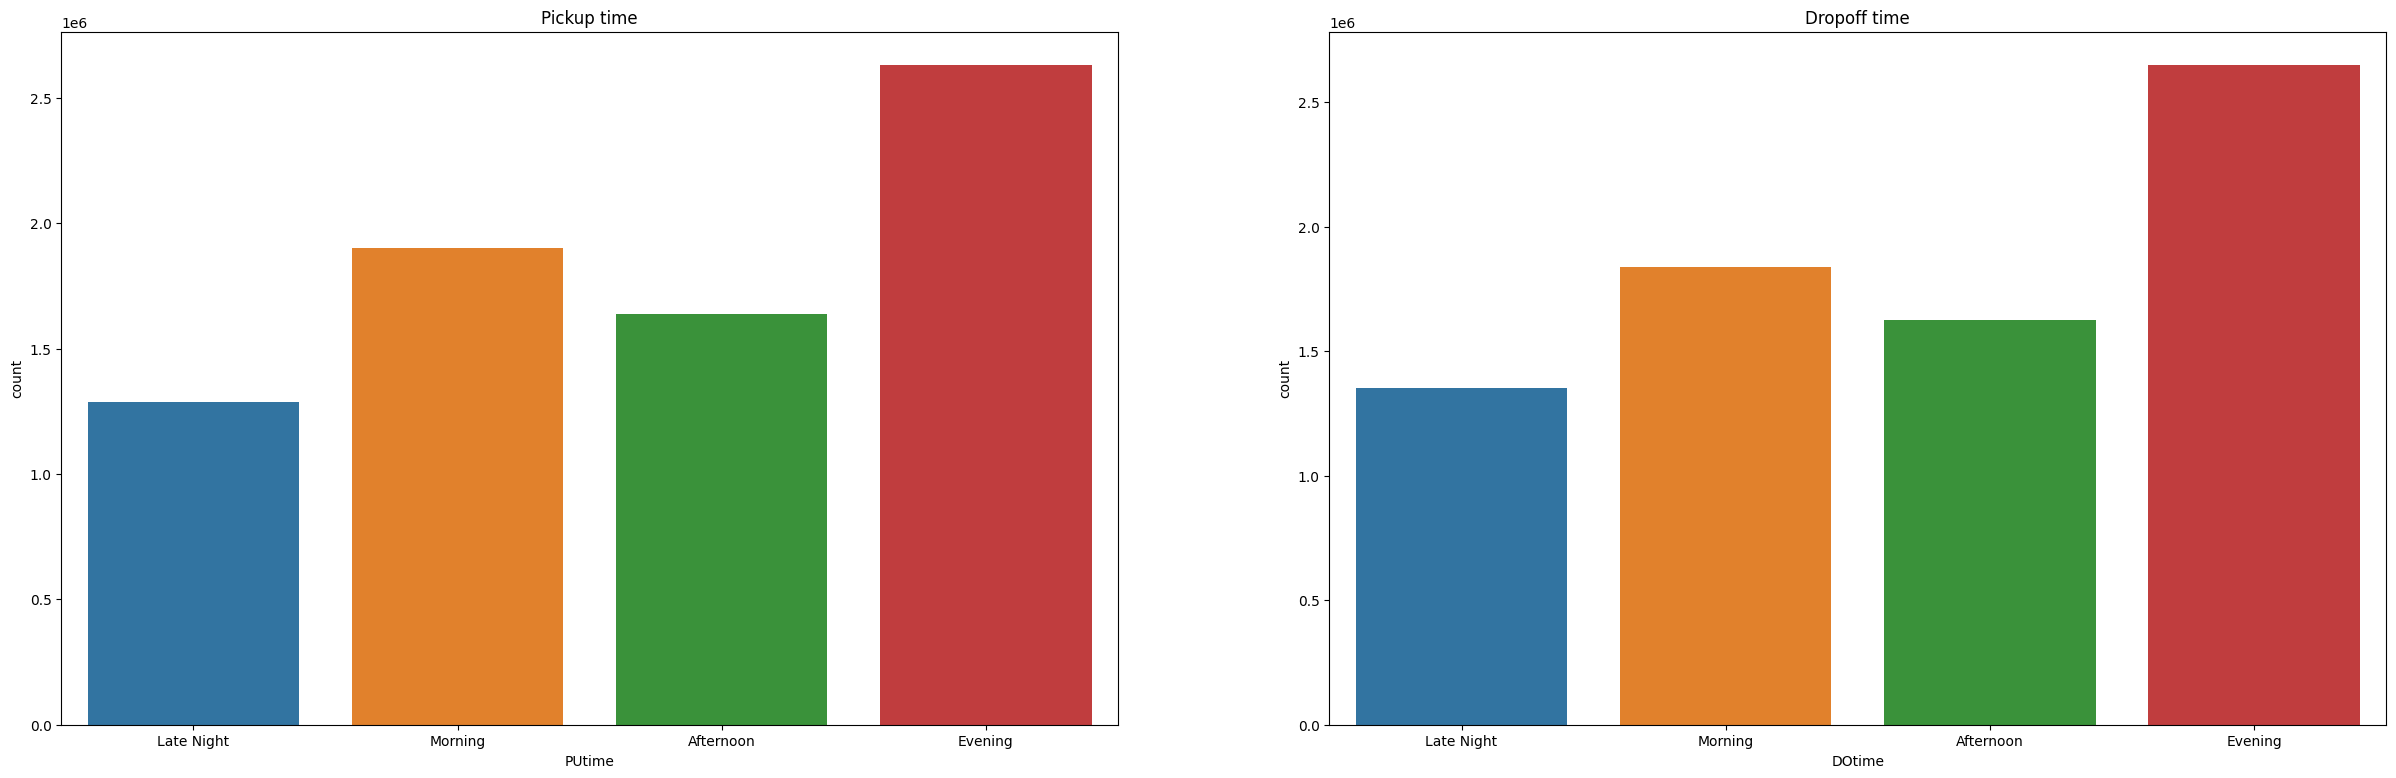

In [14]:
fig, (ax3,ax4) = plt.subplots(ncols=2, figsize=(30,9))
ax3.set_title("Pickup time")
sns.countplot(x='PUtime', data=df, ax=ax3)
ax4.set_title("Dropoff time")
sns.countplot(x='DOtime', data=df, ax=ax4)

## let us remove the outliers from total_sec variable

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6f4bff340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6f4bff880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6f4bff0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6f4bffdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc70d4f40a0>],
 'means': []}

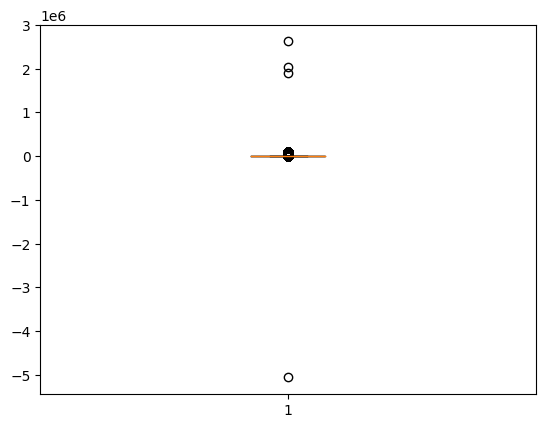

In [3]:
plt.boxplot(df['total_sec'])

In [6]:
df.drop(df[df.total_sec<-1e6].index,inplace=True)
df.drop(df[df.total_sec>1e6].index,inplace=True)

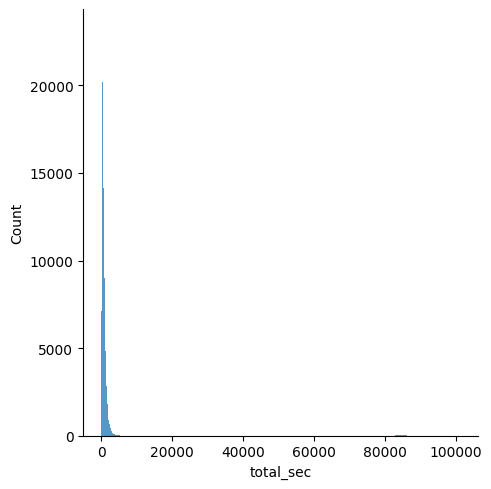

In [5]:
sns.displot(df['total_sec'])

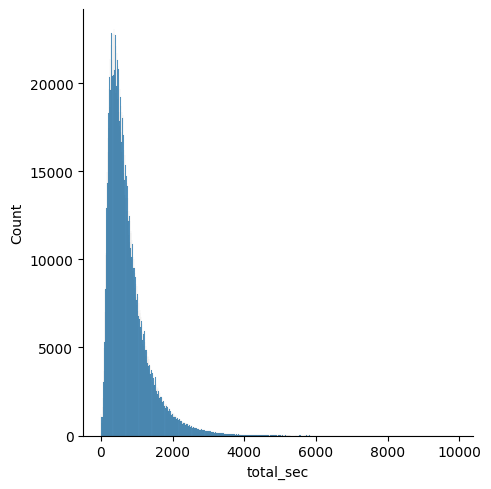

In [27]:
df.drop(df[df.total_sec>1e4].index,inplace=True)
sns.displot(df.total_sec)

In [5]:
df.drop(df[df.total_sec>4000].index,inplace=True)

In [6]:
sns.displot(df.total_sec)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f3a8d83ecb0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f3a5ddd9240> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot: >

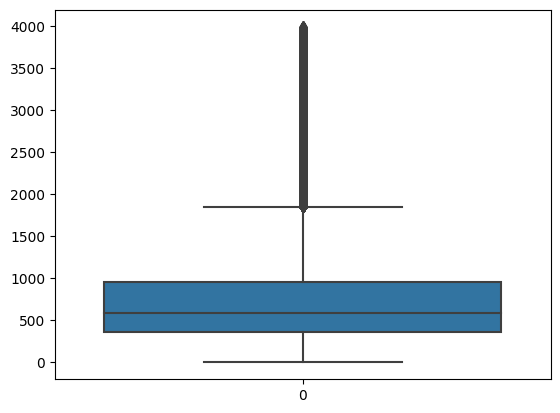

In [30]:
sns.boxplot(df.total_sec)

In [31]:
#this can be perform to remove outliers seen in the above graph. But we have other functions to convert skewed data o normal
df.drop(df[df.total_sec>1600].index,inplace=True)

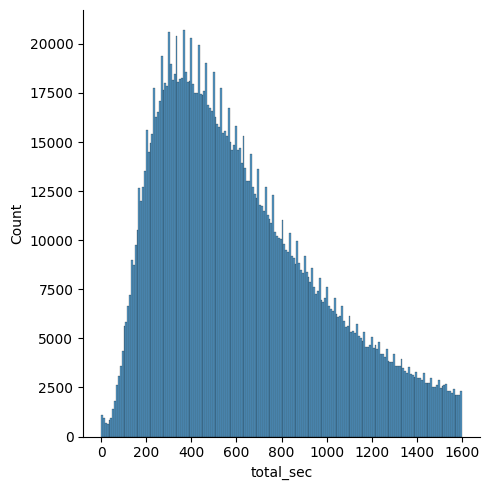

In [32]:
sns.displot(df.total_sec)

## Let us remove outliers from trip_distance

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd8dfd5e70>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd8dfd63b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd8dfd5bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd8dfd68f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd8dfd6b90>],
 'means': []}

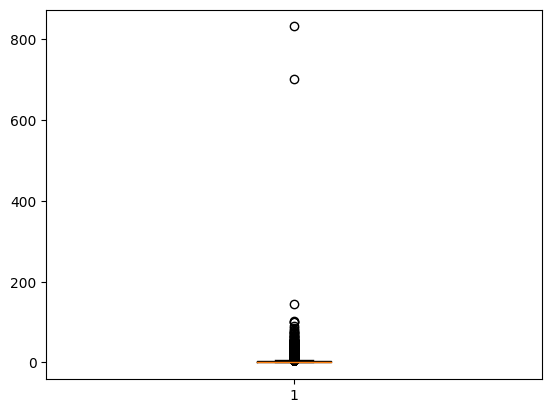

In [3]:
plt.boxplot(df.trip_distance)

As we can see having outliers are present. they will cause seeing actual histogram

In [8]:
df.drop(df[df.trip_distance>200].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a93284580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a93284ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a932842e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a93285000>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a932852a0>],
 'means': []}

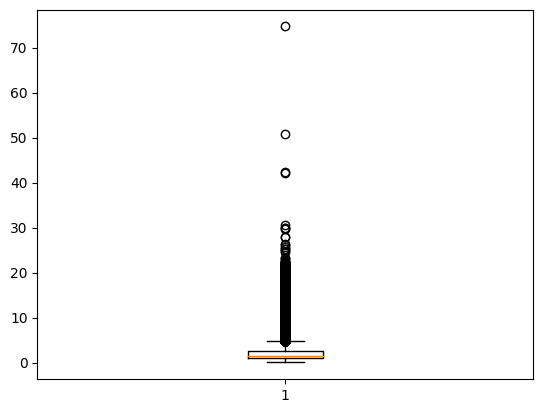

In [44]:
plt.boxplot(df.trip_distance)

In [7]:
df.drop(df[df.trip_distance>35].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a93266e30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a93267370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a93266b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a932678b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a93267b50>],
 'means': []}

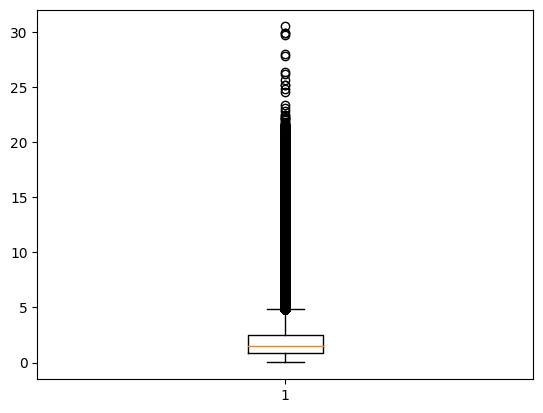

In [46]:
plt.boxplot(df.trip_distance)

In [54]:
len(df[df.trip_distance>5].trip_distance)/len(df.trip_distance)*100
#this many percnt of trips are outliers
#question is is this percent significant??

7.74589629815246

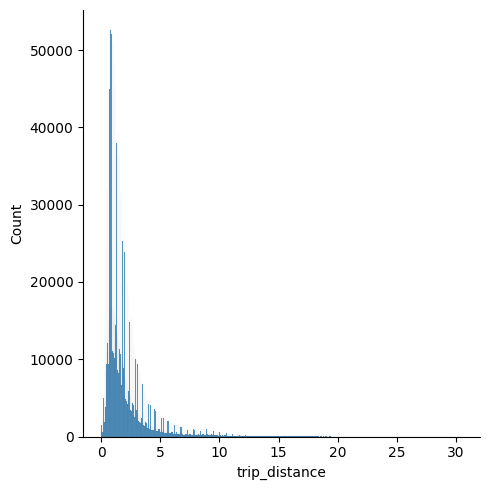

In [55]:
sns.displot(df.trip_distance)

<AxesSubplot: >

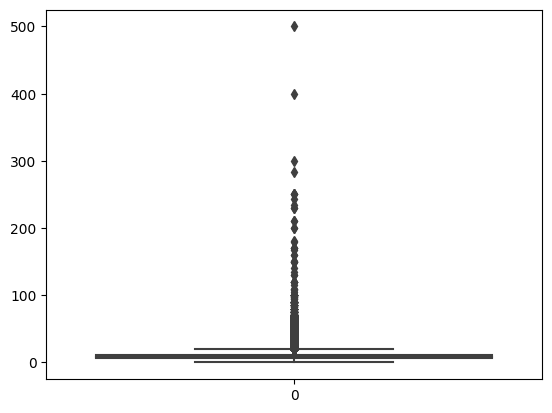

In [57]:
sns.boxplot(df.fare_amount)

<AxesSubplot: >

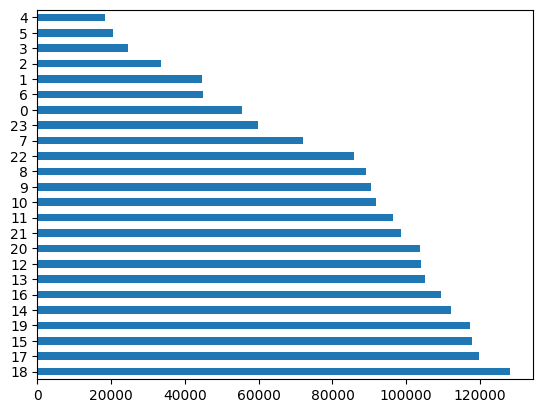

In [18]:
df.PUhour.value_counts().plot.barh()

# Bivariate analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [7]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943855 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  total_amount           float64        
 12  total_sec              float64        
 13  duration               timedelta64[ns]
 14  PUmonth                int64          
 15  DOmonth                int64          
 16  PUday                  object         
 17  DOday                  object         
 18  PU

<AxesSubplot: xlabel='PUday', ylabel='count'>

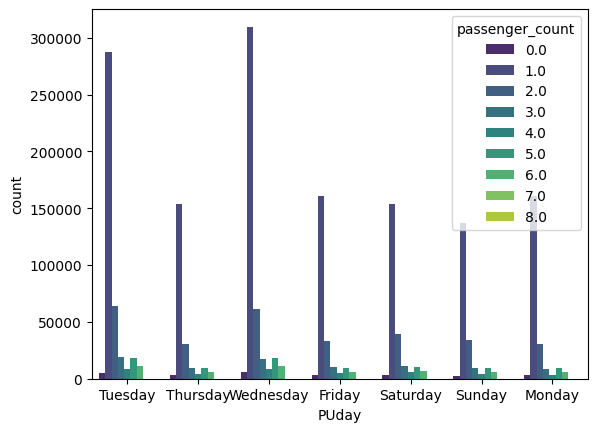

In [33]:
sns.countplot(x='PUday', hue='passenger_count', data=df, palette="viridis")

In [ ]:
z = df[['trip_distance','PULocationID']]
sns.sc(data=z,y='trip_distance',x='PULocationID',levels=5)

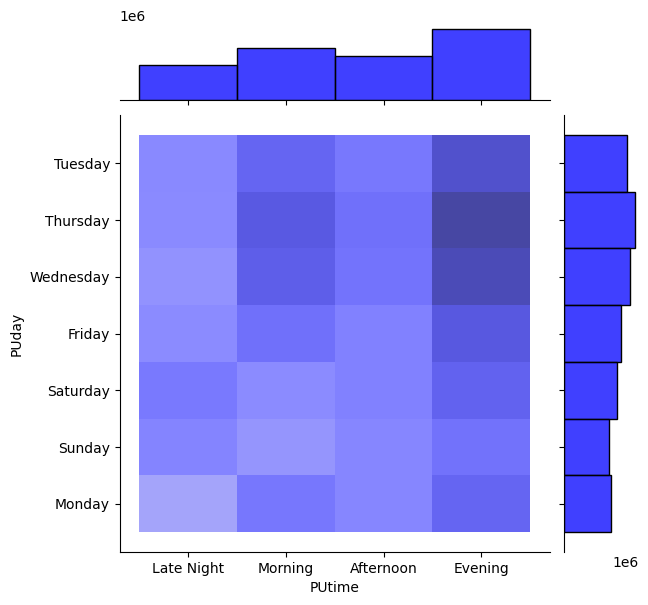

In [5]:
sns.jointplot(y='PUday',x='PUtime',data=df,kind='hist',color='blue')

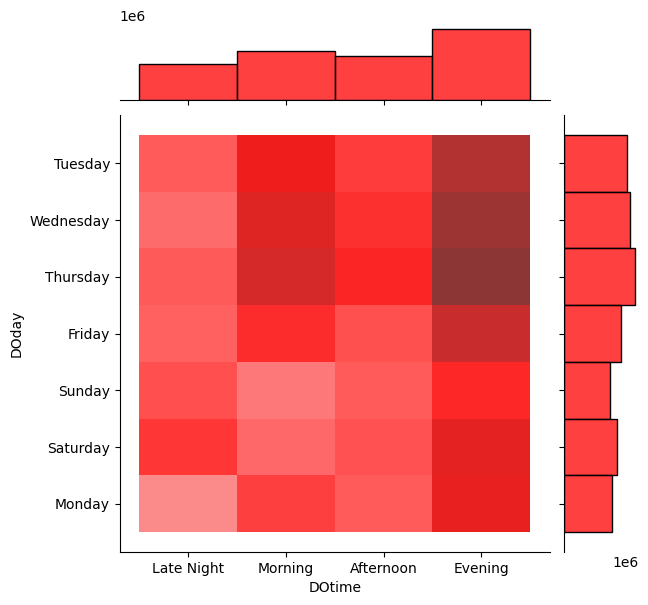

In [15]:
sns.jointplot(y='DOday',x='DOtime',data=df,kind='hist',color='red')


Pickup values > 10000 69
Dropoff values > 10000 95


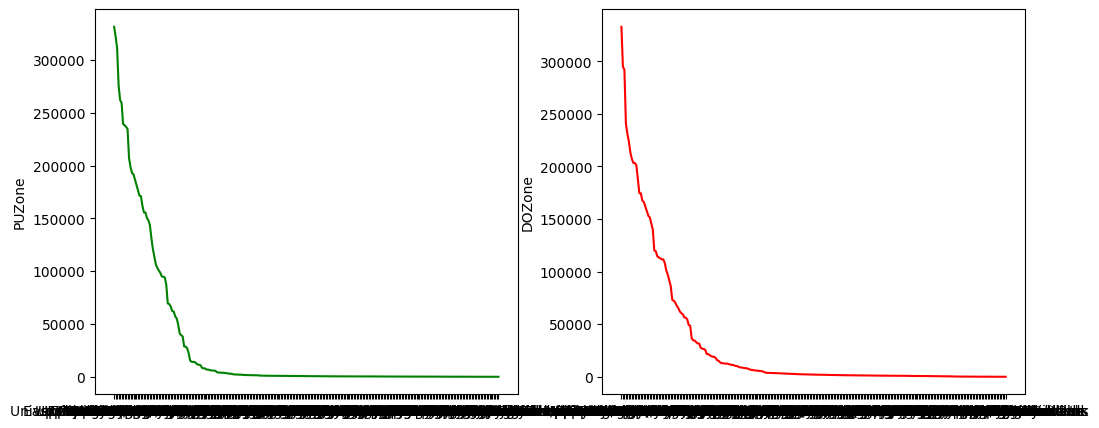

In [57]:
fig,(PUc,DOc) = plt.subplots(ncols=2,figsize=(12,5))
PUcount = df.PUZone.value_counts()
sns.lineplot(PUcount,color='Green',ax=PUc)
print("Pickup values > 10000",len(PUcount[PUcount>5000]))

DOcount = df.DOZone.value_counts()
sns.lineplot(DOcount,color='Red')
print("Dropoff values > 10000",len(DOcount[DOcount>5000]))


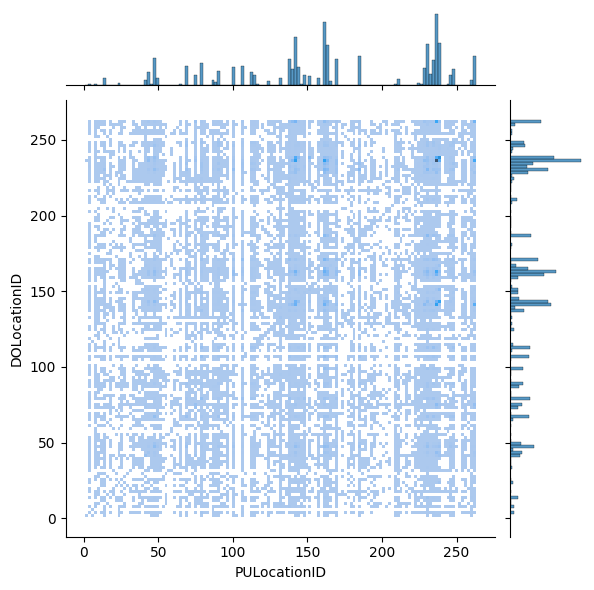

In [73]:
sns.jointplot(x=df.PULocationID, y=df.DOLocationID, kind='hist')

In [69]:
df.PULocationID.value_counts()

237    80099
236    78201
161    75207
162    65288
186    63682
       ...  
46         1
187        1
30         1
245        1
105        1
Name: PULocationID, Length: 253, dtype: int64

In [74]:
grp = df.groupby(['PULocationID','DOLocationID']).size()
grp = grp.sort_values(ascending=False)

In [95]:
grp

PULocationID  DOLocationID
237           236             12442
236           236             10892
              237             10205
237           237              9174
239           238              6677
                              ...  
224           165                 1
32            159                 1
42            248                 1
161           213                 1
63            80                  1
Length: 15566, dtype: int64

In [4]:
df1 = df[['passenger_count','trip_distance','total_amount','total_sec','PUhour','DOhour']]

<AxesSubplot: >

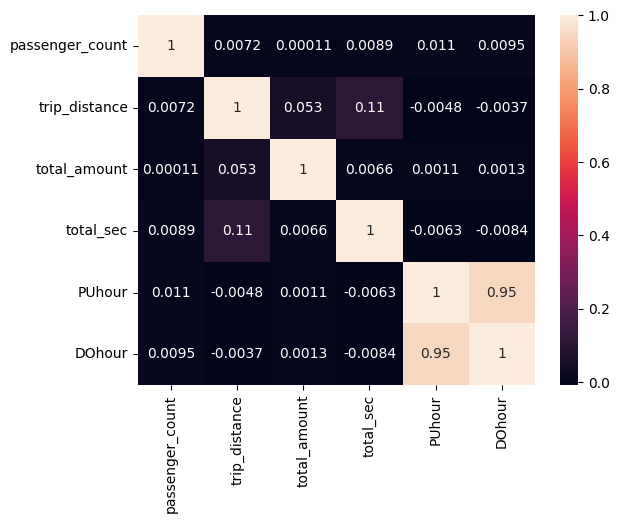

In [22]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df = df.drop(df[(df.trip_distance>500.0)].index)

In [ ]:
df.trip_distance.plot.hist()

In [ ]:
df.trip_distancedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAigAAAGdCAYAAAA44ojeAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAd2klEQVR4nO3df3TV9WH/8VcSNCKSIFYScoozR9xRZjZb7TBadmTlSC3tORmwjSPt106rPRbcFOomHqWztcZ6tOux1TI9PdUztV3LSd3MWd08eFQ2U3S47ivWUvYdFioE7HEkqBUwyfePHe6MZa1B9L4THo9z7jncz/t9733ff7xPP/n8qBkaGhoKAEBBaqu9AACANxMoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFGdctRdwMAYHB7Nt27ZMnDgxNTU11V4OAPAWDA0NZffu3WlpaUlt7a/eRzIqA2Xbtm2ZNm1atZcBAByErVu35r3vfe+vnDMqA2XixIlJ/vsLNjQ0VHk1AMBb0d/fn2nTplV+x3+VURko+/+s09DQIFAAYJR5K4dnOEgWACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4o/JCbcDYNDAwkLVr12b79u2ZOnVqZs2albq6umovC6gCe1CAInR1dWX69OmZPXt2LrjggsyePTvTp09PV1dXtZcGVIFAAaquq6srCxcuTFtbW3p6erJ79+709PSkra0tCxcuFClwGKoZGhoaqvYiRqq/vz+NjY3p6+tzLx4Y5QYGBjJ9+vS0tbXlgQceGHYL9sHBwXR0dGTDhg3ZtGmTP/fAKDeS3297UICqWrt2bZ5//vlcc801w+IkSWpra7NixYps3rw5a9eurdIKgWoQKEBVbd++PUly2mmnHXB8//b984DDg0ABqmrq1KlJkg0bNhxwfP/2/fOAw4NAAapq1qxZOfHEE3PjjTdmcHBw2Njg4GA6OzvT2tqaWbNmVWmFQDUIFKCq6urqcuutt6a7uzsdHR3DzuLp6OhId3d3brnlFgfIwmHGhdqAqps/f35Wr16d5cuX5+yzz65sb21tzerVqzN//vwqrg6oBqcZA8VwJVkY20by+20PClCMurq6nHvuudVeBlAAx6AAAMURKABAcUYUKAMDA7nuuuvS2tqa8ePH56STTsoXvvCFvPEwlqGhoaxcuTJTp07N+PHjM2fOnGzatGnY+7z00ktZvHhxGhoaMmnSpFx88cV5+eWXD803AgBGvREFype+9KV8/etfz9e+9rU899xz+dKXvpSbb745X/3qVytzbr755tx2221ZtWpV1q1blwkTJmTu3Ll57bXXKnMWL16cZ599Ng8//HC6u7vz+OOP59JLLz103woAGNVGdBbPRz/60TQ1NeUb3/hGZduCBQsyfvz43HvvvRkaGkpLS0uWL1+ez372s0mSvr6+NDU15e67786iRYvy3HPPZcaMGXnqqady5plnJkkeeuihfOQjH8nPfvaztLS0/Np1OIsHAEafd+xmgWeffXbWrFmTn/zkJ0mSf//3f88///M/5/zzz0+SbN68Ob29vZkzZ07lNY2NjZk5c2Z6enqSJD09PZk0aVIlTpJkzpw5qa2tzbp16w74uXv27El/f/+wBwAwdo3oNOOrr746/f39OeWUU1JXV5eBgYF88YtfzOLFi5Mkvb29SZKmpqZhr2tqaqqM9fb2ZsqUKcMXMW5cJk+eXJnzZp2dnbn++utHslQAYBQb0R6U73znO7nvvvty//335+mnn84999yTW265Jffcc887tb4kyYoVK9LX11d5bN269R39PACguka0B+Wqq67K1VdfnUWLFiVJ2tra8tOf/jSdnZ258MIL09zcnCTZsWPHsDuP7tixI6effnqSpLm5OTt37hz2vq+//npeeumlyuvfrL6+PvX19SNZKgAwio1oD8qrr76a2trhL6mrq6vcgbS1tTXNzc1Zs2ZNZby/vz/r1q1Le3t7kqS9vT27du3K+vXrK3MeeeSRDA4OZubMmQf9RQCAsWNEe1A+9rGP5Ytf/GJOOOGE/NZv/Vb+7d/+LV/+8pdz0UUXJUlqampyxRVX5IYbbsjJJ5+c1tbWXHfddWlpaUlHR0eS5NRTT82HP/zhXHLJJVm1alX27duXpUuXZtGiRW/pDB4AYOwbUaB89atfzXXXXZfPfOYz2blzZ1paWvLpT386K1eurMz58z//87zyyiu59NJLs2vXrnzwgx/MQw89lKOOOqoy57777svSpUvzoQ99KLW1tVmwYEFuu+22Q/etAIBRzd2MAYB3xTt2HRQAgHeDQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDjjqr0AgP0GBgaydu3abN++PVOnTs2sWbNSV1dX7WUBVWAPClCErq6uTJ8+PbNnz84FF1yQ2bNnZ/r06enq6qr20oAqEChA1XV1dWXhwoVpa2tLT09Pdu/enZ6enrS1tWXhwoUiBQ5DNUNDQ0PVXsRI9ff3p7GxMX19fWloaKj2coC3YWBgINOnT09bW1seeOCB1Nb+z/83DQ4OpqOjIxs2bMimTZv8uQdGuZH8ftuDAlTV2rVr8/zzz+eaa64ZFidJUltbmxUrVmTz5s1Zu3ZtlVYIVINAAapq+/btSZLTTjvtgOP7t++fBxweBApQVVOnTk2SbNiw4YDj+7fvnwccHgQKUFWzZs3KiSeemBtvvDGDg4PDxgYHB9PZ2ZnW1tbMmjWrSisEqkGgAFVVV1eXW2+9Nd3d3eno6Bh2Fk9HR0e6u7tzyy23OEAWDjMu1AZU3fz587N69eosX748Z599dmV7a2trVq9enfnz51dxdUA1OM0YKIYrycLYNpLfb3tQgGLU1dXl3HPPrfYygAI4BgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAijPiQHnhhRfy8Y9/PMcdd1zGjx+ftra2/Ou//mtlfGhoKCtXrszUqVMzfvz4zJkzJ5s2bRr2Hi+99FIWL16choaGTJo0KRdffHFefvnlt/9tAIAxYUSB8l//9V8555xzcsQRR+T73/9+fvSjH+XWW2/NscceW5lz880357bbbsuqVauybt26TJgwIXPnzs1rr71WmbN48eI8++yzefjhh9Pd3Z3HH388l1566aH7VgDAqFYzNDQ09FYnX3311fmXf/mXrF279oDjQ0NDaWlpyfLly/PZz342SdLX15empqbcfffdWbRoUZ577rnMmDEjTz31VM4888wkyUMPPZSPfOQj+dnPfpaWlpZfu47+/v40Njamr68vDQ0Nb3X5AEAVjeT3e0R7UP7+7/8+Z555Zv7wD/8wU6ZMyfve977cddddlfHNmzent7c3c+bMqWxrbGzMzJkz09PTkyTp6enJpEmTKnGSJHPmzEltbW3WrVt3wM/ds2dP+vv7hz0AgLFrRIHyn//5n/n617+ek08+Of/4j/+Yyy67LH/6p3+ae+65J0nS29ubJGlqahr2uqampspYb29vpkyZMmx83LhxmTx5cmXOm3V2dqaxsbHymDZt2kiWDQCMMiMKlMHBwbz//e/PjTfemPe973259NJLc8kll2TVqlXv1PqSJCtWrEhfX1/lsXXr1nf08wCA6hpRoEydOjUzZswYtu3UU0/Nli1bkiTNzc1Jkh07dgybs2PHjspYc3Nzdu7cOWz89ddfz0svvVSZ82b19fVpaGgY9gAAxq4RBco555yTjRs3Dtv2k5/8JL/xG7+RJGltbU1zc3PWrFlTGe/v78+6devS3t6eJGlvb8+uXbuyfv36ypxHHnkkg4ODmTlz5kF/EQBg7Bg3kslXXnllzj777Nx44435oz/6ozz55JO58847c+eddyZJampqcsUVV+SGG27IySefnNbW1lx33XVpaWlJR0dHkv/e4/LhD3+48qehffv2ZenSpVm0aNFbOoMHABj7RnSacZJ0d3dnxYoV2bRpU1pbW7Ns2bJccskllfGhoaF87nOfy5133pldu3blgx/8YO6444785m/+ZmXOSy+9lKVLl+bBBx9MbW1tFixYkNtuuy3HHHPMW1qD04wBYPQZye/3iAOlBAIFAEafd+w6KAAA7waBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABTnbQXKTTfdlJqamlxxxRWVba+99lqWLFmS4447Lsccc0wWLFiQHTt2DHvdli1bMm/evBx99NGZMmVKrrrqqrz++utvZykAwBhy0IHy1FNP5a//+q/z27/928O2X3nllXnwwQfz3e9+N4899li2bduW+fPnV8YHBgYyb9687N27N0888UTuueee3H333Vm5cuXBfwsAYEw5qEB5+eWXs3jx4tx111059thjK9v7+vryjW98I1/+8pfz+7//+znjjDPyzW9+M0888UR+8IMfJEn+6Z/+KT/60Y9y77335vTTT8/555+fL3zhC7n99tuzd+/eQ/OtAIBR7aACZcmSJZk3b17mzJkzbPv69euzb9++YdtPOeWUnHDCCenp6UmS9PT0pK2tLU1NTZU5c+fOTX9/f5599tkDft6ePXvS398/7AEAjF3jRvqCb3/723n66afz1FNP/dJYb29vjjzyyEyaNGnY9qampvT29lbmvDFO9o/vHzuQzs7OXH/99SNdKgAwSo1oD8rWrVvzZ3/2Z7nvvvty1FFHvVNr+iUrVqxIX19f5bF169Z37bMBgHffiAJl/fr12blzZ97//vdn3LhxGTduXB577LHcdtttGTduXJqamrJ3797s2rVr2Ot27NiR5ubmJElzc/MvndWz//n+OW9WX1+fhoaGYQ8AYOwaUaB86EMfyjPPPJMf/vCHlceZZ56ZxYsXV/59xBFHZM2aNZXXbNy4MVu2bEl7e3uSpL29Pc8880x27txZmfPwww+noaEhM2bMOERfCwAYzUZ0DMrEiRNz2mmnDds2YcKEHHfccZXtF198cZYtW5bJkyenoaEhl19+edrb23PWWWclSc4777zMmDEjn/jEJ3LzzTent7c31157bZYsWZL6+vpD9LUAgNFsxAfJ/jp/9Vd/ldra2ixYsCB79uzJ3Llzc8cdd1TG6+rq0t3dncsuuyzt7e2ZMGFCLrzwwnz+858/1EsBAEapmqGhoaFqL2Kk+vv709jYmL6+PsejAMAoMZLfb/fiAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4owoUDo7O/OBD3wgEydOzJQpU9LR0ZGNGzcOm/Paa69lyZIlOe6443LMMcdkwYIF2bFjx7A5W7Zsybx583L00UdnypQpueqqq/L666+//W8DAIwJIwqUxx57LEuWLMkPfvCDPPzww9m3b1/OO++8vPLKK5U5V155ZR588MF897vfzWOPPZZt27Zl/vz5lfGBgYHMmzcve/fuzRNPPJF77rknd999d1auXHnovhUAMKrVDA0NDR3si1988cVMmTIljz32WH7v934vfX19Of7443P//fdn4cKFSZIf//jHOfXUU9PT05Ozzjor3//+9/PRj34027ZtS1NTU5Jk1apV+Yu/+Iu8+OKLOfLII3/t5/b396exsTF9fX1paGg42OUDAO+ikfx+v61jUPr6+pIkkydPTpKsX78++/bty5w5cypzTjnllJxwwgnp6elJkvT09KStra0SJ0kyd+7c9Pf359lnnz3g5+zZsyf9/f3DHgDA2HXQgTI4OJgrrrgi55xzTk477bQkSW9vb4488shMmjRp2Nympqb09vZW5rwxTvaP7x87kM7OzjQ2NlYe06ZNO9hlAwCjwEEHypIlS7Jhw4Z8+9vfPpTrOaAVK1akr6+v8ti6des7/pkAQPWMO5gXLV26NN3d3Xn88cfz3ve+t7K9ubk5e/fuza5du4btRdmxY0eam5src5588slh77f/LJ/9c96svr4+9fX1B7NUAGAUGtEelKGhoSxdujTf+9738sgjj6S1tXXY+BlnnJEjjjgia9asqWzbuHFjtmzZkvb29iRJe3t7nnnmmezcubMy5+GHH05DQ0NmzJjxdr4LADBGjGgPypIlS3L//ffn7/7u7zJx4sTKMSONjY0ZP358Ghsbc/HFF2fZsmWZPHlyGhoacvnll6e9vT1nnXVWkuS8887LjBkz8olPfCI333xzent7c+2112bJkiX2kgAASUZ4mnFNTc0Bt3/zm9/MJz/5yST/faG25cuX51vf+lb27NmTuXPn5o477hj255uf/vSnueyyy/Loo49mwoQJufDCC3PTTTdl3Li31ktOMwaA0Wckv99v6zoo1SJQAGD0edeugwIA8E4QKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxRnSzQIB30sDAQNauXZvt27dn6tSpmTVrVurq6qq9LKAK7EEBitDV1ZXp06dn9uzZueCCCzJ79uxMnz49XV1d1V4aUAUCBai6rq6uLFy4MG1tbenp6cnu3bvT09OTtra2LFy4UKTAYcjdjIGqGhgYyPTp09PW1pYHHnggtbX/8/9Ng4OD6ejoyIYNG7Jp0yZ/7oFRzt2MgVFj7dq1ef7553PNNdcMi5Mkqa2tzYoVK7J58+asXbu2SisEqkGgAFW1ffv2JMlpp512wPH92/fPAw4PAgWoqqlTpyZJNmzYcMDx/dv3zwMODwIFqKpZs2blxBNPzI033pjBwcFhY4ODg+ns7Exra2tmzZpVpRUC1SBQgKqqq6vLrbfemu7u7nR0dAw7i6ejoyPd3d255ZZbHCALhxkXagOqbv78+Vm9enWWL1+es88+u7K9tbU1q1evzvz586u4OqAanGYMFMOVZGFsG8nvtz0oQDHq6upy7rnnVnsZQAEcgwIAFEegAADFESgAQHEECgBQHIECABTHWTxAMZxmDOxnDwpQhK6urpx00kmZPXt2LrjggsyePTsnnXRSurq6qr00oAoEClB1XV1dWbBgQbZs2TJs+5YtW7JgwQKRAochgQJU1cDAQC666KIkyfHHH5+77ror27dvz1133ZXjjz8+SXLRRRdlYGCgmssE3mUCBaiqRx55JH19fTn22GPzwgsv5FOf+lSam5vzqU99Ki+88EKOPfbY9PX15ZFHHqn2UoF3kUABqupv/uZvkiSf//znU1NTk0cffTTf+ta38uijj6ampiZ/+Zd/OWwecHhwFg9QVbt3706SbNu2LdOnT8/zzz9fGTvxxBOzaNGiYfOAw4NAAapq1qxZeeCBB9LZ2Zl58+blqquuyvjx4/OLX/wi//AP/5CbbrqpMg84fNQMDQ0NVXsRIzWS2zUDZfvFL36Ro48+OkkqYbLfG5+/+uqrGT9+fFXWCBwaI/n9dgwKUFXr1q2r/PuNcfLm52+cB4x9AgWoqhdeeCFJMmXKlAOO79++fx5weBAoQFW9+OKLSZKdO3fmqKOOGjZ21FFHZefOncPmAYcHgQJU1XHHHVf595svxvbG52+cB4x9AgWoqv17SJJk3759w8be+PyN84CxT6AAVfXzn//8kM4DxgaBAlTVGy/MduSRRw4be+PzN84Dxj6BAlTVxo0bK//eu3fvsLE3Pn/jPGDsEyhAVdXU1BzSecDYIFCAqpo6deohnQeMDQIFqKpXXnnlkM4DxgaBAlTVW71CrCvJwuFFoABV9VbvVzoK72sKvA0CBaiqyZMnH9J5wNggUICq2rx58yGdB4wNAgWoqrd6E0A3C4TDi0ABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKU9VAuf3223PiiSfmqKOOysyZM/Pkk09WczkAQCHGVeuD//Zv/zbLli3LqlWrMnPmzHzlK1/J3Llzs3HjxkyZMqVaywIOwquvvpof//jH7/jnPP300wf1ulNOOSVHH330IV4N8E6qGRoaGqrGB8+cOTMf+MAH8rWvfS1JMjg4mGnTpuXyyy/P1Vdf/Stf29/fn8bGxvT19aWhoeHdWC6MWZs2bcru3bvf1ns899xz+fjHP36IVnTo3XvvvTn11FPf1ntMnDgxJ5988iFaERyeRvL7XZU9KHv37s369euzYsWKyrba2trMmTMnPT09vzR/z5492bNnT+V5f3//u7JOGOv+7/p1+eRHzz4k7/W+5nIPabv1s//nkLzPdx75Yaaf2nZI3gv41aoSKD//+c8zMDCQpqamYdubmpoOuJu4s7Mz119//bu1PDhs/L9138/Tnz6m2ssYNbb0P59EoMC7oWrHoIzEihUrsmzZssrz/v7+TJs2rYorgrFh1h9cnO99L5WD1Q/Wnj17sm3btoN+/bXXXvtr59xwww0H/f4tLS2pr68/6NcnyYQJE3LC+z70tt4DeOuqEijvec97UldXlx07dgzbvmPHjjQ3N//S/Pr6+rf9Hxfgl71n6rT8wWf+8pC81+lv47UfuXhFampq/tfxKh0qB1RRVf5ofOSRR+aMM87ImjVrKtsGBwezZs2atLe3V2NJQJX9bxEiTuDwVLU/8SxbtiwXXnhhzjzzzPzu7/5uvvKVr+SVV17Jn/zJn1RrSUCViRFgv6oFyh//8R/nxRdfzMqVK9Pb25vTTz89Dz300C8dOAsAHH6qdh2Ut8N1UABg9BnJ73e5Fy4AAA5bAgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDhVu9T927H/4rf9/f1VXgkA8Fbt/91+KxexH5WBsnv37iTJtGnTqrwSAGCkdu/encbGxl85Z1Tei2dwcDDbtm3LxIkTU1NTU+3lAIdQf39/pk2blq1bt7rXFowxQ0ND2b17d1paWlJb+6uPMhmVgQKMXW4GCiQOkgUACiRQAIDiCBSgKPX19fnc5z6X+vr6ai8FqCLHoAAAxbEHBQAojkABAIojUACA4ggUAKA4AgUowuOPP56PfexjaWlpSU1NTR544IFqLwmoIoECFOGVV17J7/zO7+T222+v9lKAAozKmwUCY8/555+f888/v9rLAAphDwoAUByBAgAUR6AAAMURKABAcQQKAFAcZ/EARXj55ZfzH//xH5Xnmzdvzg9/+MNMnjw5J5xwQhVXBlSDuxkDRXj00Ucze/bsX9p+4YUX5u677373FwRUlUABAIrjGBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDi/H+h4p9JR4IE/wAAAABJRU5ErkJggg==.max()

In [ ]:
print("Max and min Pickup location ID :",df.PULocationID.max(),df.PULocationID.min())

In [ ]:
df['PUZone'].value_counts()

In [ ]:
df.PULocationID.map(taxizone.Borough).value_counts()

In [ ]:
df.DOLocationID.map(taxizone.Borough).value_counts()

In [ ]:
import geopandas as gpd

In [ ]:
taxizone = pd.read_csv("taxizone.csv")

In [69]:
maps = gpd.read_file("taxi_zones.zip")

In [86]:
x = df.PULocationID.map(taxizone.Borough)
y = df.DOLocationID.map(taxizone.Borough)

In [87]:
PUmap = maps.borough.map(x.value_counts())
DOmap = maps.borough.map(y.value_counts())

In [93]:
PUmap = maps.LocationID.map(df.PULocationID)
DOmap = maps.LocationID.map(df.DOLocationID)

<AxesSubplot: >

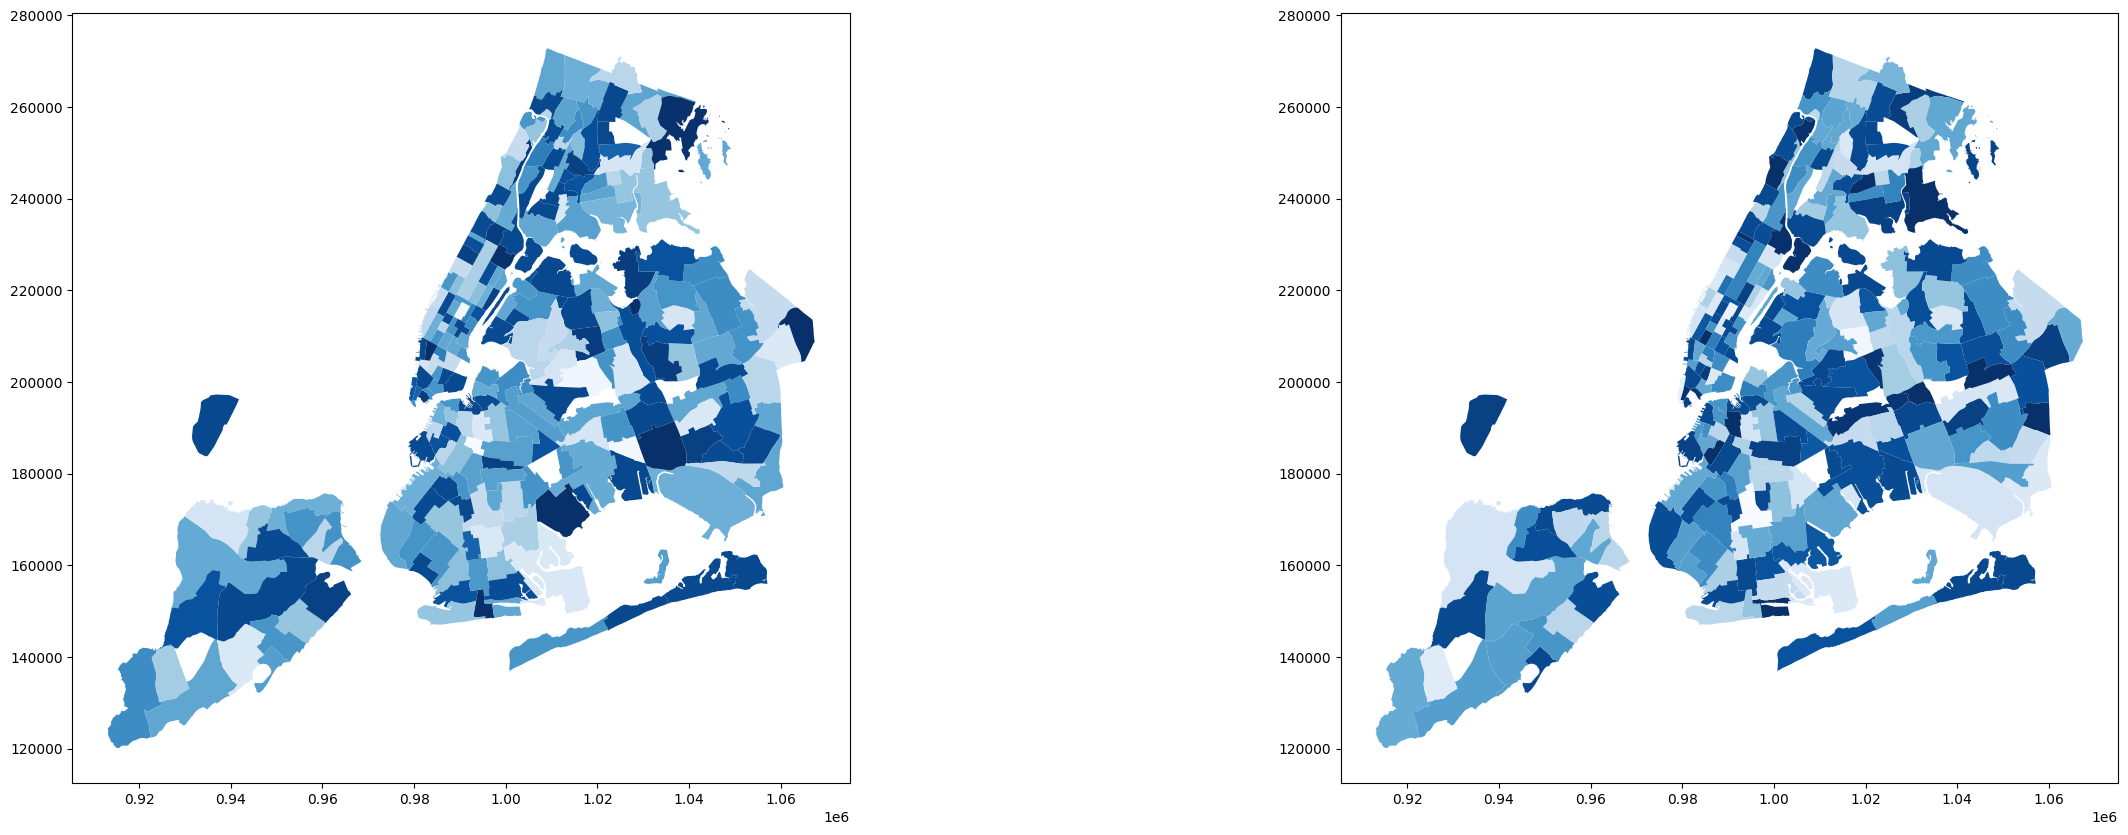

In [98]:
fig,(PUm,DOm) = plt.subplots(ncols=2, figsize=(30,10))
maps.plot(column=PUmap,ax=PUm,cmap='Blues')
maps.plot(column=DOmap,ax=DOm,cmap='Blues')

<AxesSubplot: >

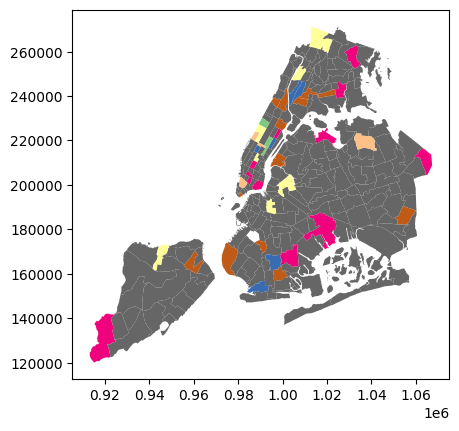

In [114]:
maps.plot(column = maps.zone.map(df.DOZone.value_counts()), cmap='Accent_r')

In [68]:
df1.loc[(df1.payment_type == 3),['payment_type', 'fare_amount']]

,payment_type,fare_amount
176,3,4.0
214,3,8.0
371,3,5.0
389,3,7.0
475,3,42.5
...,...,...
7666490,3,5.0
7666891,3,4.5
7666995,3,2.5
7667324,3,10.5


In [61]:
any((df.duration<0))

True

#references


#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
#https://medium.com/analytics-vidhya/exploratory-data-analysis-nyc-taxi-price-prediction-using-python-44fce176a8fe